# 1. Importazione delle librerie necessarie

In questa sezione vengono importate tutte le librerie necessarie: per la gestione e manipolazione dei dati, per la costruzione e valutazione dei modelli, per visualizzazioni e grafici, per il preprocessing dei dati e codifica, per la gestione dello sbilanciamento nella variabile target e per la costruzione di micro-pipeline per rendere più compatti e veloci alcune parti di codice.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

_____Import librerie completato_____


# 2. Caricamento del dataset

In questa sezione viene importato il dataset in formato csv e viene omessa la prima colonna con l'identificativo dell'osservazione. Infine è stampata la dimensione del dataset (numero di esempi e features).

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

_____Import dataset completato_____

Numero di righe: 381109, Numero di colonne: 11


# 3. Esplorazione del dataset

In questa sezione viene mostrata un'analisi esplorativa del dataset: dalle generalità ad un approfondimento sulla target e sulla relazione con le features.

### 3.1 Generalità

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

_____Anteprima dataset (prime 10 righe)_____



,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0


Dettagli features e target:
- id: identificativo univoco del cliente.
- Gender: sesso del cliente.
- Age: età del cliente.
- Driving_License: 1 se il cliente possiede la patente di guida, 0 altrimenti.
- Region_Code: codice univoco della regione di residenza del cliente.
- Previously_Insured: 1 se il cliente ha già un veicolo assicurato, 0 altrimenti.
- Vehicle_Age: età del veicolo del cliente.
- Vehicle_Damage: 1 se il cliente ha avuto incidenti o danni al veicolo in passato, 0 altrimenti.
- Annual_Premium: importo annuale del premio assicurativo pagato dal cliente.
- PolicySalesChannel: canale utilizzato per la vendita della polizza (es. email, telefono, di persona).
- Vintage: giorni da cui il cliente è assicurato con AssurePredict.
- Response: 1 se il cliente ha accettato la proposta di cross-sell, 0 altrimenti.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

_____Informazioni fenerali sul dataset_____

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


Già da questi primi output si evidenzia la necessaria codifica delle variabili categoriche (alcune sono già codificate, altre sono già da codificare). Si fa presente che nonostante la maggior parte delle variabili siano riconosciute come numeriche, in realtà sono solo tre.<br>
Di seguito le statistiche descrittive per le sole variabili numeriche.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

_____Statistiche descrittive (colonne numeriche)_____



,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


Da un primo sguardo non sembrano esserci anomalie nelle statistiche descrittive e i range di massimo-minimo sono plausibili per le tre features numeriche.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

_____Valori mancanti per colonna_____



,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


Il dataset risulta interamente bilanciato (assenza di valori mancanti)

### 3.2 Analisi variabile target (Response)

_____Distribuzione della variabile target (valori assoluti)_____

Response
0    334399
1     46710
Name: count, dtype: int64

_____Distribuzione della variabile target (valori relativi in percentuale)_____

Response
0    87.74
1    12.26
Name: proportion, dtype: float64



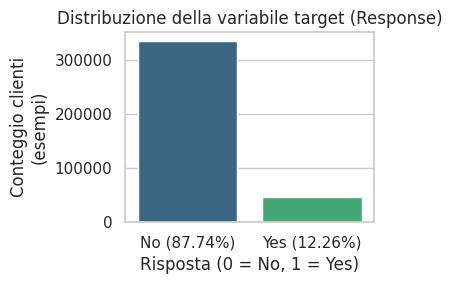

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

La variabile target è fortemente sbilanciata. Infatti solo il 12.26% dei clienti ha risposto positivamente all'offerta (ovvero solo il 12.26% degli esempi presenta una target=1).<br>
Questo sbilanciamento sarà gestito in fase di modellazione e verranno mostrate tre soluzioni per il modello più appropriato.

### 3.3 Analisi features categoriche vs Response

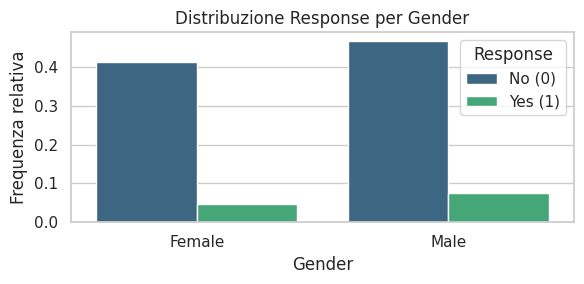

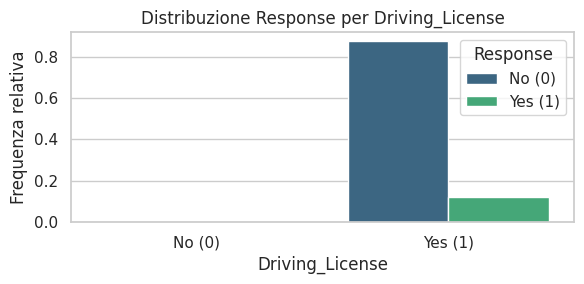

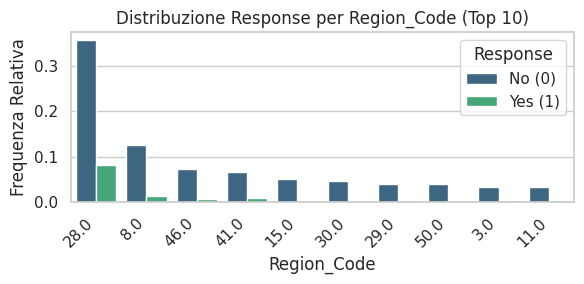

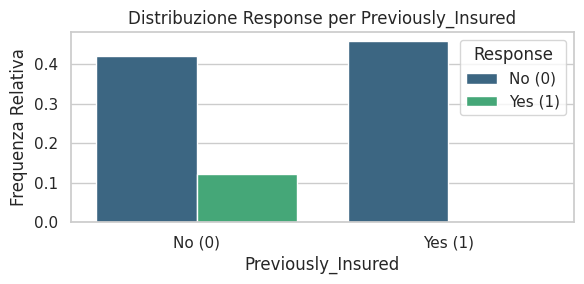

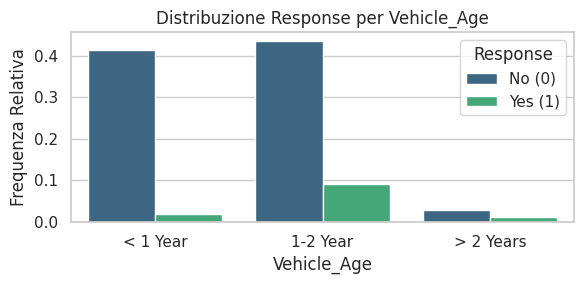

<ipython-input-91-066d671f1d7b>:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col_name] = df[col_name].replace({'Yes': 1, 'No': 0})


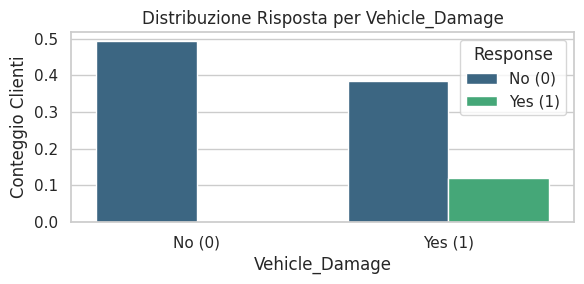

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

Lo sbilanciamento nelle distribuzioni è evidente e notevole. Emergono interessanti pattern:
- La propensione ad accettare l'offerta di cross-selling è superiore negli uomini piuttosto che nelle donne nel campione.
- Nella regione con codice 28 c'è la più alta percentuale di risposta positiva all'offerta.
- Gli individui precedentemente assicurati non hanno acettato in alcun caso l'offerta. Quindi la propensione ad accettare è più alta in individui che precedentemente NON avevano veicoli assicurati.
- Se il veicolo ha da 1 a 2 anni allora la propensione ad accettare l'offerta è superiore rispetto a quando il veicolo è stato comprato di recente (< 1 anno) oppure se ha una età superiore a 2. Si evidenzia che il rapporto tra chi accetta e chi rifiuta è più alto nei casi di veicoli con età > 2 anni (infatti in questo caso il rapporto è quasi 0.5, invece nelle restanti tre categorie è sicuramente più basso).
- Gli individui che non hanno avuto incidenti rifiutano sempre l'offerta. Invece tra chi ha avuto incidenti, circa 1/3 accetta.
<br>
<br>
Già questa analisi basta ad indirizzare le campagne di marketing verso clienti target dove c'è un alto tasso di rifiuto ma comunque la propensione ad accettare è bassa ma positiva.

### 3.4 Analisi features numeriche vs Response

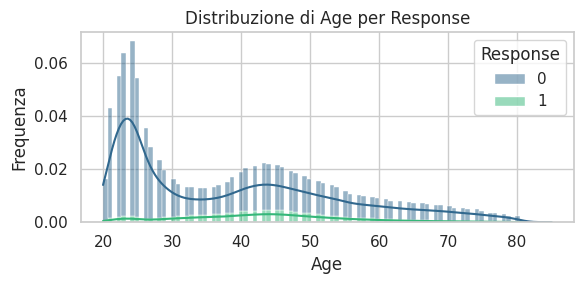

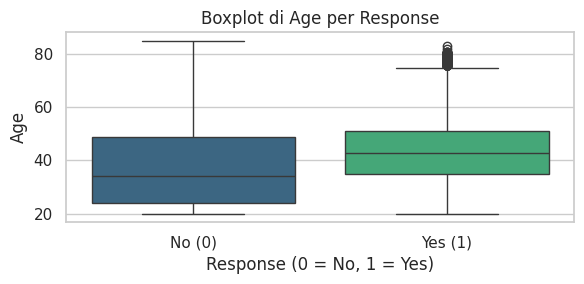

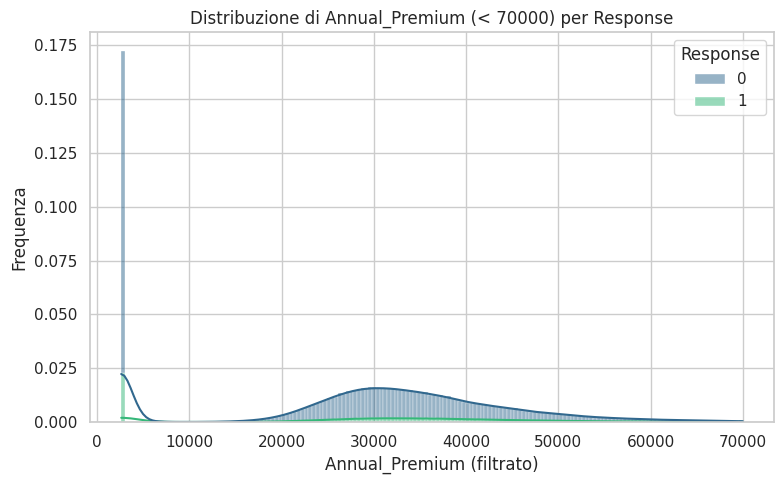

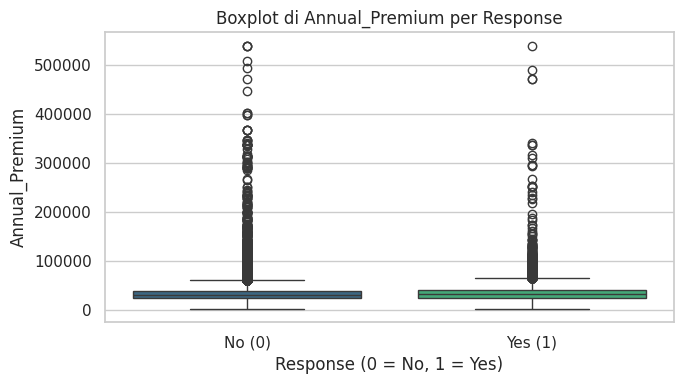

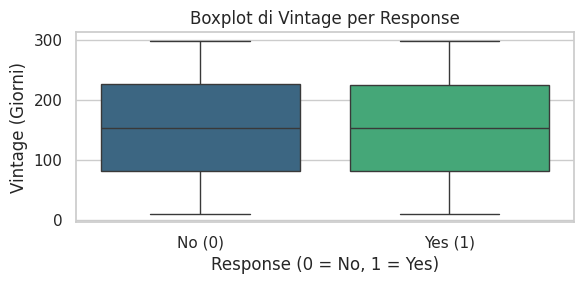

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

Anche in questa analisi emergono interessanti pattern:
- Il più alto tasso di accettazione della proposta si riscontra nella fascia d'età tra 40 e 50 anni. D'altra parte gli individui tra 20 e 30 anni sono molto più propensi a rifiutare. L'ipotesi che si potrebbe avanzare è che gli individui più giovani hanno probabilmente fatto pochi incidenti (o nessuno) e dai pattern precedenti si è visto che chi non ha fatto incidenti è incline a rifiutare.
- La distribuzione per età di chi accetta presenta degli outliers quando è superiore a 75 anni.
- Quando il premio assicurativo annuale è basso, la propensione ad accettare è molto alto. Si tenga conto che nelle distribuzioni di Annual_Premium (sia nel caso di Response=1 che di Response=0) ci sono molti ouliers quando la feature assume valori superiori a circa 50000.


### 3.5 Analisi features numeriche

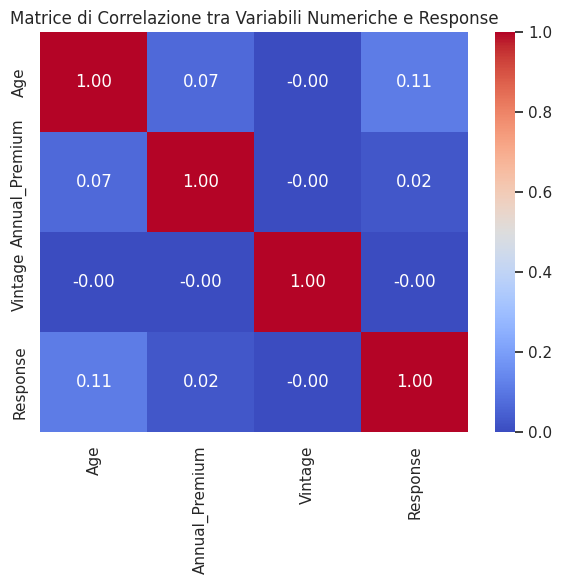

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

La matrice di correlazione mostra che non ci sono correlazioni lineari molto forti tra le variabili numeriche e la target, ma soprattutto che tra di esse non ci sono alti gradi di correlazione.

# 4. Preprocessing dei dati

In questa sezione viene mostrato il pre-processamento dei dati.<br>
Vengono estratte prima le features numeriche e categoriche (divise in features ad alta e bassa cardinalità ma trattate in modo identico per semplicità). Poi sono create ed applicate due micro-pipeline (aggregate infine in una sola) per il preprocessing delle features in base alla natura.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

# 5. Divisione del dataset in training-set e test-set

In questa sezione si esegue lo slplitting (Hold-Out) del dataset in modo che il 70% dei dati vengano usati nei training e il 30% nei test. Di seguito vengono poi stampate le effettive dimensioni dei vari set.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

Dimensioni Training Set: X_train=(266776, 10), y_train=(266776,)

Dimensioni Test Set: X_test=(114333, 10), y_test=(114333,)

Distribuzione 'Response' nel Training Set (in percentuale):
Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

Distribuzione 'Response' nel Test Set (in percentuale):
Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


# 6. Costruzione modelli con differente gestione dello sbilanciamento delle classi

Si precisa che:
1. Tra i vari modelli implementabili per questo progetto la regressione logistica è l'unico modello appropriato data la natura della variabile target.
2. Da un confronto con implementazioni omesse (Naive Bayes, Random Forest, SVC, LightGBM e XGBoost) la regressione logistica ottiene performance superiori.
3. Il tuning dei parametri (omesso poichè non richiesto in questo progetto) sui tre modelli presentati di seguito arrivano a richiedere dai 20 ai 60 minuti circa e nonostante l'ottimizzazione, le performance e la minimizzazione dei falsi negativi sono pressocchè identici alle configurazioni di default presentate.
4. Per l'applicazione del transform e del fit_transform per X test e X train viene costruita una pipeline per una gestione più veloce, ordinata ed efficente del processo (nel modello 3 invece vengono gestite queste fasi manualmente).
<br>
<br>
Questa sezione si compone di 2 fasi:
- Fase 1: sono mostrati 3 modelli (regressioni logistiche) in cui viene gestito in modo differente lo sbilanciamento nella target tramite diverse tecniche (uso del parametro class_weight='balanced', SMOTE e RUS).<br>
Ad ogni modello segue la sua valutazione e la learning curve. Viene dunque scelto il miglior modello.
- Fase 2: considerato che l'obiettivo è minimizzare i falsi negativi, quindi massimizzare la recall, viene proposta una variante del miglior modello in cui viene impostata manualmente la soglia di probabilità sottostante il modello logistico. Ovviamente la soglia che massimizza la recall è prossima allo zero (qualsiasi cross validation restituirebbe valori tali), quindi la proposta è un compromesso che genera un numero ragionevole di falsi negativi



**Differenza tra i modelli proposti nella fase 1 per gestire lo sbilanciamento tra le classi nella target:**<br>
- LR (Balanced): Modifica i pesi nella funzione di costo senza alterare i dati e tende ad aumentare la Recall rispetto a un modello non bilanciato.
- LR (SMOTE): Crea campioni "sintetici" della classe minoritaria e può aumentare ulteriormente la Recall talvolta a scapito della Precision (più falsi positivi). In questo caso emerge il rischio di overfitting se i campioni sintetici non sono ben rappresentativi.
- LR (UnderSampled): Rimuove campioni della classe maggioritaria (in questo caso specifico response=0) e spesso conduce ad una Recall molto alta (il modello infatti si concentrerà sulla distinzione tra i pochi campioni rimasti). In questo caso si può riscontrare una precision molto bassa a causa della perdita di informazioni sulla classe maggioritaria.


In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

### 6.1 Modello 1 e learning curve

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Valutazione:
              precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.94      0.43     14013

    accuracy                           0.69    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.69      0.74    114333

ROC AUC: 0.8482



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**Premessa:** <br>
Con riferimento al messaggio di warning, durante l'applicazione del preprocessor al test set (X_test), sono stati trovati valori nella colonna con indice 6 che non erano mai stati visti durante l'addestramento (fit) sul training set (X_train). Ciò era una eventualità soprattutto nei casi, ad esempio, delle features Region_Code o Policy_Sales_Channel.
Questa situazione è gestita tramite il parametro handle_unknown='ignore' nel OneHotEncoder. Questo fa sì che queste categorie "mai viste" vengano trasformate in un vettore di zeri, permettendo al modello di procedere nell'elaborazione.<br>
<br>
**Classe 1:**<br>
- precision: 0.28: valore molto basso. Quando il modello predice "1", solo il 28% delle volte la previsione è corretta. Il restante 72% sono falsi positivi.<br>
- recall: 0.94: questo valore è estremamente alto. Il modello riesce a identificare correttamente il 94% di tutti i clienti che hanno accettato la proposta di cross-selling (basso numero di falsi negativi).<br>
f1-score: 0.43: essendo la media armonica di precision e recall, questo valore è basso, trascinato verso il basso dalla scarsa precision. Indica un cattivo bilanciamento tra le due metriche per questa classe.

**Classe 0:**<br>
- precision: 0.99: molto alta. Se il modello predice "0", è quasi certamente corretto.<br>
- recall: 0.66: valore medio-basso. Il modello identifica correttamente solo il 66% dei clienti che non accettano. Il restante 34% dei non interessati viene erroneamente classificato come interessato (questi sono i falsi positivi che causano la bassa precisione per la classe 1).<br>
-f1-score: 0.79: è un valore medio-alto ed indica un buon bilanciamento tra le due metriche per questa classe.

**Accuracy:** 0.69: Questa metrica è ingannevole a causa del forte sbilanciamento delle classi, quindi non è affidabile in questo contesto.

**ROC AUC:** 0.8482: questo è un punteggio (score) buono. Indica che il modello, indipendentemente dalla soglia di classificazione, ha una buona capacità di distinguere un cliente che accetta da uno che non accetta. È significativamente migliore di un modello casuale (AUC = 0.5).

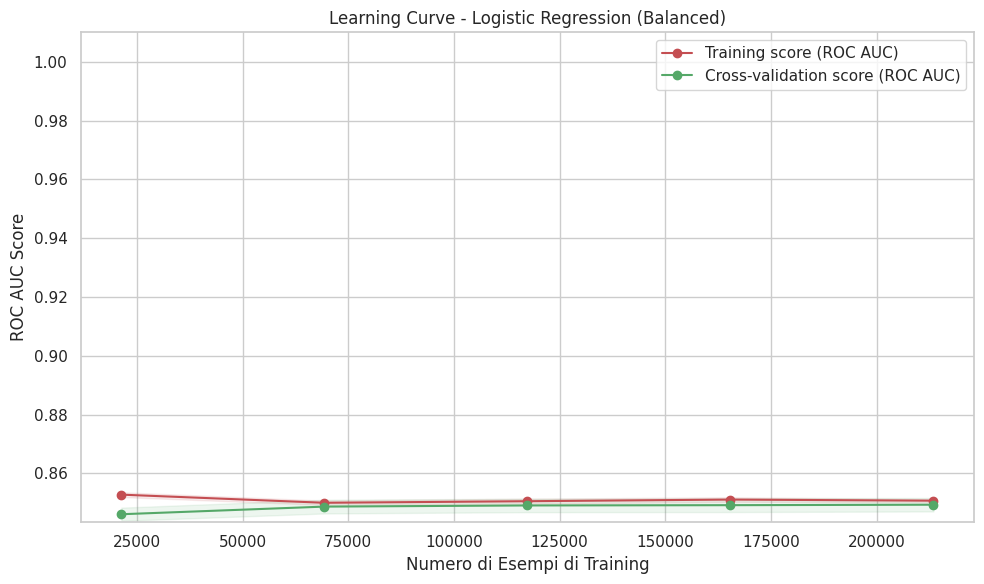


Punteggio medio finale di Cross-Validation (con 213420 esempi): 0.8493


In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

La lerning curve mostra che da un piccolo gap iniziale tra training e test, poi si converge più o meno verso uno stesso valore. Quindi il modello apprende e generalizza bene. Le performance non sono eccellenti ma comunque buone.<br>
Sicuramente il modello non è in overfitting, ma aggiungere altri dati non migliorerà le performance. Migliori performance sono auspicabili con l'applicazione di altri modelli oppure aggiungendo features più informative.

### 6.2 Modello 2 e learning curve

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

Distribuzione classi (Training) prima di SMOTE (nel fit): Counter({0: 234079, 1: 32697})
Predizione Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Valutazione:
              precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.69    114333
   macro avg       0.63      0.79      0.61    114333
weighted avg       0.90      0.69      0.74    114333

ROC AUC: 0.8475



**Premessa:** <br>
Vale quanto detto precedentemente sul messaggio di warning. Inoltre di seguito sono evidenziate solo le differenze col modello precedente dato che hanno performance pressocchè identiche.<br>
<br>
**Classe 1:**<br>
- recall: 0.93: è un valore estremamente alto e suggeriche che il modello riesce a identificare correttamente il 93% di tutti i clienti che hanno accettato la proposta di cross-selling (basso numero di falsi negativi).<br>

**Classe 0:**<br>
- Tutte le metriche sono identiche al modello precedente.

**Accuracy:** identica al modello precedente.

**ROC AUC:** 0.8475: è un buon punteggio, leggermente inferiore a quello del modello precedente.

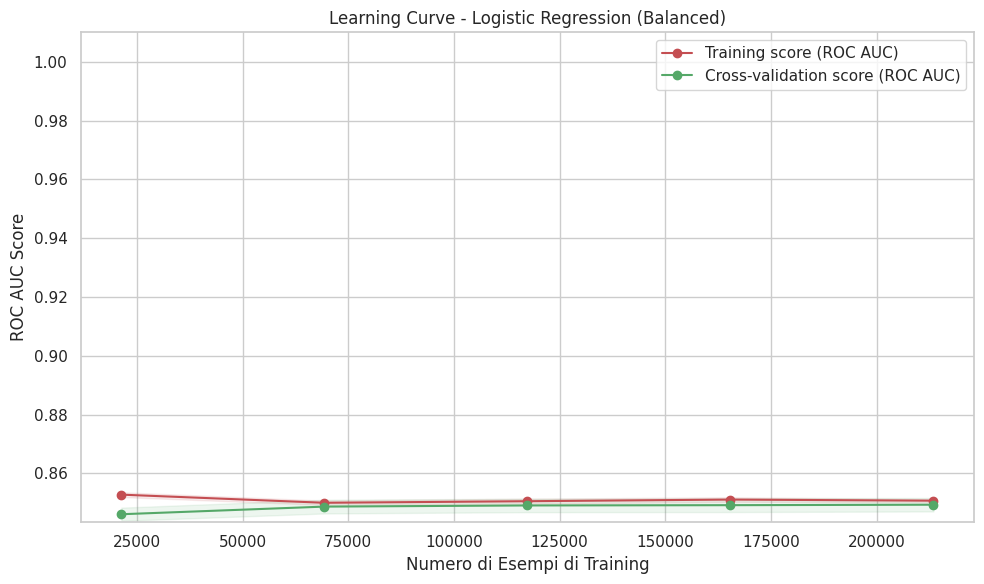


Punteggio medio finale di Cross-Validation (con 213420 esempi): 0.8493


In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

L'andamento della learning curve ha le stesse caratteristiche del modello precedente.

### 6.3 Modello 3 e learning curve

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Distribuzione classi (Training) prima di RUS: Counter({0: 234079, 1: 32697})
Distribuzione classi (Training) dopo RUS: Counter({0: 32697, 1: 32697})
Dimensione Training Set dopo RUS: (65394, 210)
Valutazione:
              precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.94      0.43     14013

    accuracy                           0.69    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.69      0.74    114333

ROC AUC: 0.8477



**Premessa:** <br>
Vale quanto detto precedentemente sul messaggio di warning. Inoltre di seguito sono evidenziate solo le differenze col modello precedente dato che hanno performance pressocchè identiche.<br>
<br>
**Classe 1:**<br>
- recall: 0.94: è un valore alto, come nei due modelli precedenti e suggeriche che il modello riesce a identificare correttamente il 94% di tutti i clienti che hanno accettato la proposta di cross-selling (con un conseguente basso numero di falsi negativi).<br>

**Classe 0:**<br>
- Tutte le metriche sono identiche al modello precedente.

**Accuracy:** identica al modello precedente.

**ROC AUC:** 0.8477: è un buon punteggio, leggermente inferiore a caso del primo modello ma superiore a quello del modello precedente.

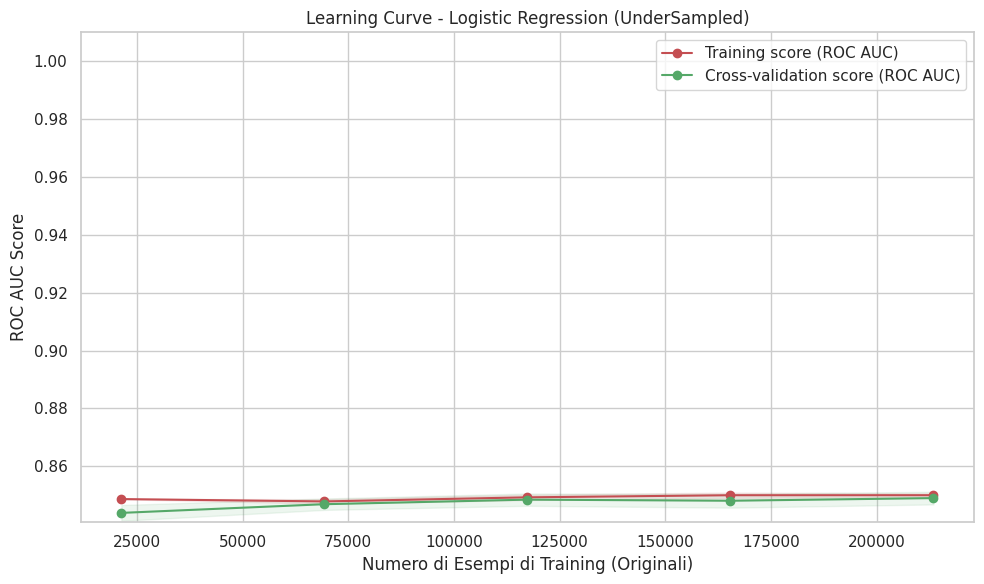


Punteggio medio finale di Cross-Validation (con 213420 esempi originali): 0.8490


In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

L'andamento della learning curve ha le stesse caratteristiche dei modelli precedenti.

### 6.4 Fase 2 e implementazione del Modello 4

Dei tre modelli precedentemente presentati, poichè hanno tutti un ROC AUC simile, quello con più bassa recall è quello in cui viene applicato il RUS (modello 3). Di questo modello, nella presente sezione, viene proposta la variante (Modello 4) con impostazione manuale della soglia di probabilità sottostante al modello.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

Soglia manuale per la variante (basata sul modello 3 - RUS) impostata a: 0.25

Valutazione Modello 4 con soglia = 0.25):
              precision    recall  f1-score   support

           0       1.00      0.57      0.73    100320
           1       0.24      0.99      0.39     14013

    accuracy                           0.62    114333
   macro avg       0.62      0.78      0.56    114333
weighted avg       0.90      0.62      0.69    114333

ROC AUC (basato su y_prob_lr_under, indipendente dalla soglia): 0.8477



La learning curve del modello 4 è omessa poichè è uguale a quella del modello 3.<br>
La  Variante Modello 3 (ovvero Modello 4) non ridefinisce il processo di addestramento ma semplicemente prende le probabilità generate dal lr_under_classifier (processo Modello 3) e applica una soglia diversa da 0.5.
La learning curve per il modello 3 è la stessa che analizza il modello che sta alla base della Variante del modello 3 (ovvero Modello 4). <br>
La learning curve si concentra sul processo di apprendimento del modello ed è indipendente dalla scelta della soglia di decisione finale.

L'obiettivo posto è quindi stato raggiunto. Ovvero un modello con una recall del 99% circa con performance non eccellenti a comunque buone.

# 7. Confronto tra i modelli e conclusioni

In questa sezione vengono comparati i modelli costruiti e viene scelto il modello finale. Si ricorda che l'obiettivo è minimizzare i falsi negativi quindi la metrica a cui si darà più peso è la recall della classe response=1. Di seguito viene mostrata anche la matrice di confusione per i tre modelli.

_____Performance modelli_____
                              Modello  Accuracy  Precision (Class 1)  \
0      Logistic Regression (Balanced)    0.6917               0.2764   
2  Logistic Regression (UnderSampled)    0.6901               0.2757   
3        LR (UnderSampled - Thr=0.25)    0.6221               0.2433   
1         Logistic Regression (SMOTE)    0.6917               0.2757   

   Recall (Class 1)  F1-Score (Class 1)  ROC AUC  
0            0.9366              0.4268   0.8482  
2            0.9389              0.4262   0.8477  
3            0.9871              0.3903   0.8477  
1            0.9318              0.4256   0.8475  


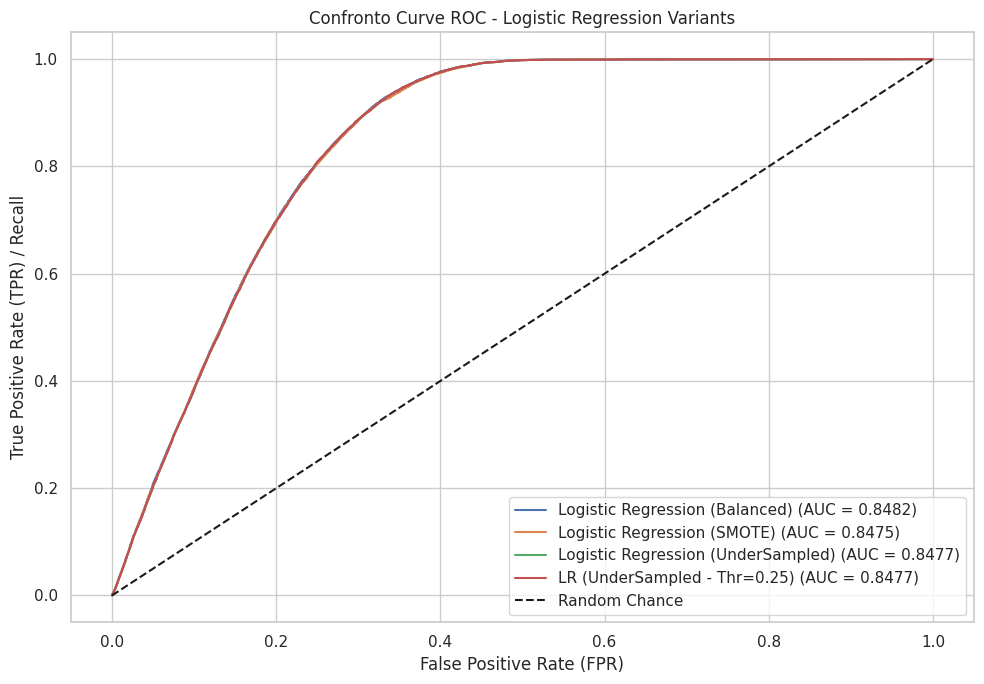

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

______________________________________________________________________________

 
_____Logistic Regression (Balanced)_____
Matrice di Confusione (array):
[[65957 34363]
 [  889 13124]]
TN: 65957, FP: 34363, FN: 889, TP: 13124


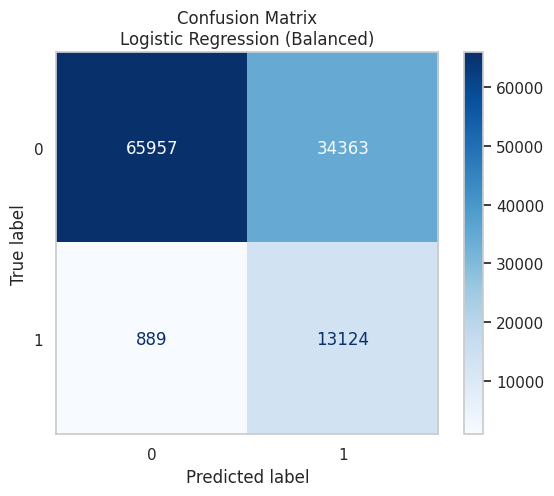

______________________________________________________________________________

 
_____Logistic Regression (SMOTE)_____
Matrice di Confusione (array):
[[66026 34294]
 [  956 13057]]
TN: 66026, FP: 34294, FN: 956, TP: 13057


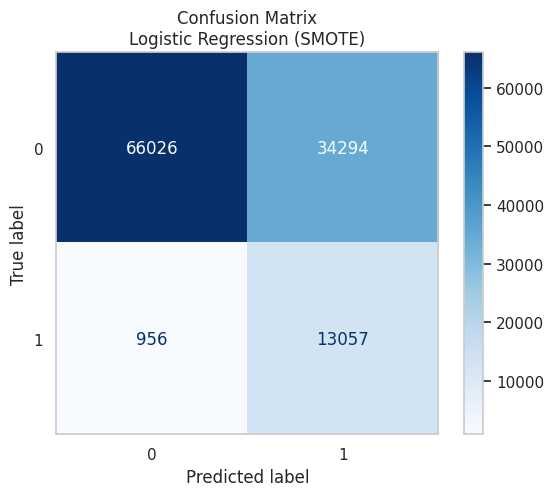

______________________________________________________________________________

 
_____Logistic Regression (UnderSampled)_____
Matrice di Confusione (array):
[[65747 34573]
 [  856 13157]]
TN: 65747, FP: 34573, FN: 856, TP: 13157


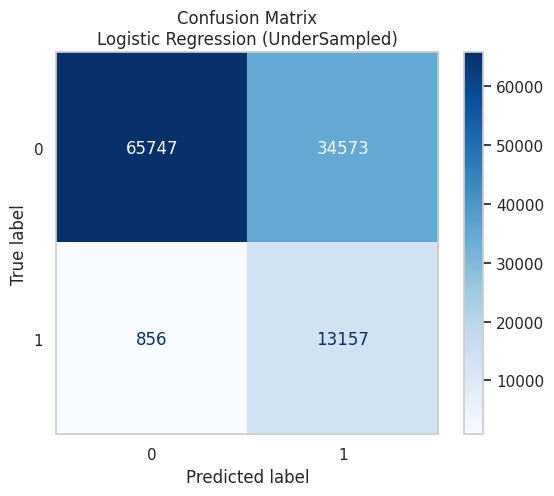

______________________________________________________________________________

 
_____LR (UnderSampled - Thr=0.25)_____
Matrice di Confusione (array):
[[57294 43026]
 [  181 13832]]
TN: 57294, FP: 43026, FN: 181, TP: 13832


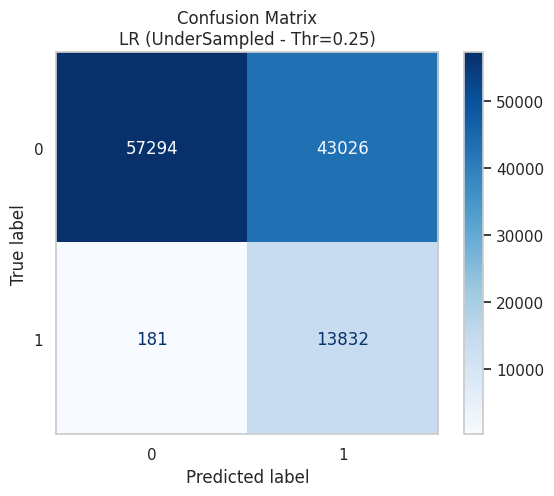

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

Con una recall di 0.9871 e un ROC AUC di 0.8477. Il Modello 4 è il miglior modello per il problema che si sta affrontando. Dalla matrice di confusione si evidenzia che i falsi negativi ottenuti sono solo 181.<br>
Un ipotetico modello 5 (estremo) con soglia di probabilità prossima a 0 genererebbe falsi negativi prossimi a 0.